In [1]:
import nltk
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
G = nx.Graph()

# first level similar: woman

In [11]:
# adding first level nodes similar to 'woman'
woman_1_dict = {
    # first level similar words to woman:
    'woman': ['reached', 'till', 'friend', 'word', 'moment', 'saw', 'always', 'could', 'cried', 'sailor', 'wit', 'scarcely', 'petticoat', 'go', 'servant', 'conclusion']
}

# create second graph object passing dict of nodes/edges
g1 = nx.Graph(woman_1_dict)
# https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html
plot = nx.draw_networkx(g1, pos=None, arrows=None, with_labels=True, node_size=100, node_color="#A0CBE2", font_size=4, font_color="navy", font_weight="bold", width=.5)

# uncomment below to save the image
plt.savefig("first_level_woman.png", dpi=1000)

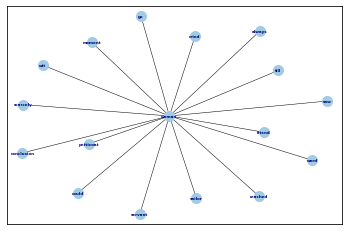

# second level similar: woman

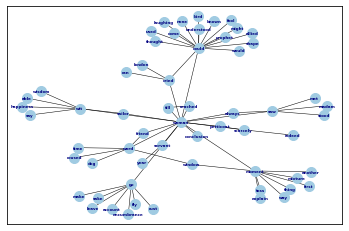

In [13]:
woman_2_dict = {
    # first level similar words to woman:
    'woman': ['reached', 'till', 'friend', 'word', 'moment', 'saw', 'always', 'could', 'cried', 'sailor', 'wit', 'scarcely', 'petticoat', 'go', 'servant', 'conclusion'],
    # second level similar words to woman:
    'reached': ['till'],
    'till': ['reached'],
    'friend': ['word'],
    'word': ['friend', 'woman', 'time', 'dog', 'window', 'roused'],
    'moment': ['explain', 'thing', 'another', 'mixture', 'toss', 'way', 'window', 'first'],
    'saw': ['always', 'met', 'madam', 'stood'],
    'could': ['might', 'used', 'understood', 'prophet', 'bird', 'thought', 'come', 'shape', 'none', 'would', 'cried', 'allied', 'known', 'laughing', 'fool'],
    'cried': ['london', 'could', 'ran'],
    'sailor': ['wit'],
    'wit': ['able', 'happiness', 'wisdom', 'sailor', 'say'], 
    'scarcely': ['indeed'], 
    'petticoat': ['scarcely'], 
    'go': ['encumbrance', 'account', 'fly', 'leave', 'rust', 'make', 'sake'], 
    'servant': ['year'], 
    'conclusion': []
}

# create second graph object passing dict of nodes/edges
g2 = nx.Graph(woman_2_dict)

plot = nx.draw_networkx(g2, pos=None, arrows=None, with_labels=True, node_size=100, node_color="#A0CBE2", font_size=4, font_color="navy", font_weight="bold", width=.5)

# uncomment below to save the image
plt.savefig("second_level_woman.png", dpi=1000)